In [1]:
!pip install torch==2.2
!pip install fastai==2.7.14

  Using cached torch-2.2.0-cp39-none-macosx_11_0_arm64.whl.metadata (25 kB)
Using cached torch-2.2.0-cp39-none-macosx_11_0_arm64.whl (59.7 MB)
DEPRECATION: pytorch-lightning 1.7.0 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.4.1 requires torch==1.12.1, but you have torch 2.2.0 which is incompatible.
DEPRECATION: pytorch-lightning 1.7.0 has a non-standard depe

In [2]:
import os
from fastai.vision.all import *

/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <ADC0A61A-5B83-3A02-975F-EE5DFF441305> /Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [3]:
path = untar_data(URLs.MNIST)
print(path)

/Users/Ashish.Jha/.fastai/data/mnist_png


In [4]:
files = get_image_files(path/"training")
print(len(files))
print(files[0])

60000
/Users/Ashish.Jha/.fastai/data/mnist_png/training/9/36655.png


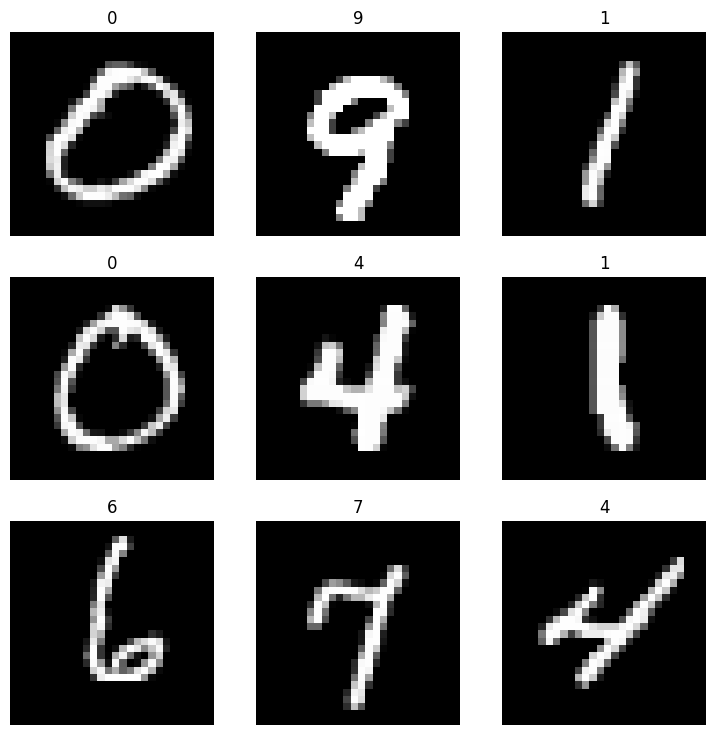

In [5]:
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func, num_workers=0)
dls.show_batch()

In [6]:
learn = vision_learner(dls, arch=resnet18, metrics=accuracy)

SuggestedLRs(valley=0.002511886414140463)

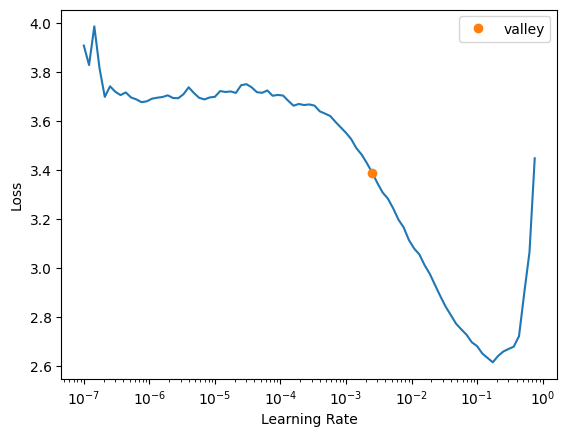

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(epochs=2, base_lr=0.0012, freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,0.866534,0.645225,0.797000,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.165812,0.090367,0.971167,01:06
1,0.099531,0.058884,0.981417,01:00


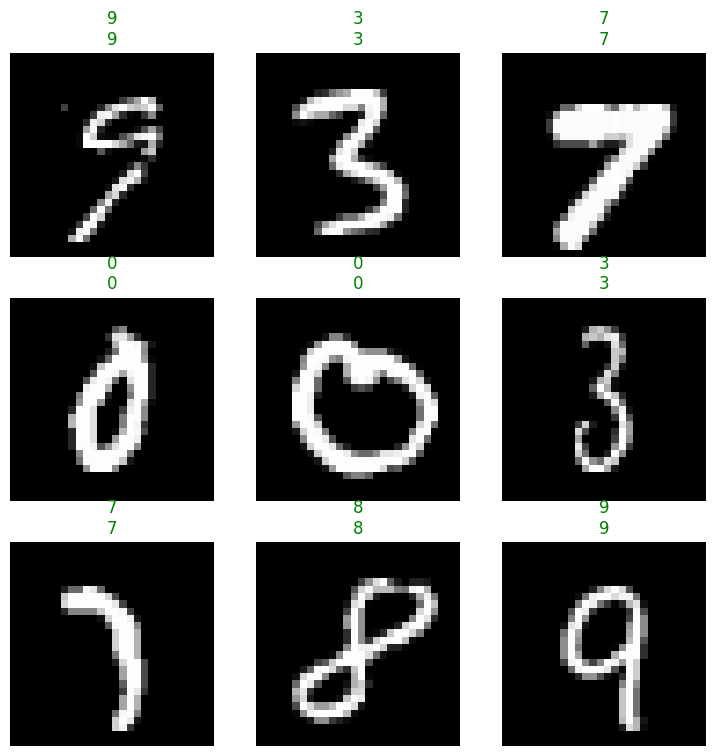

In [9]:
learn.show_results()

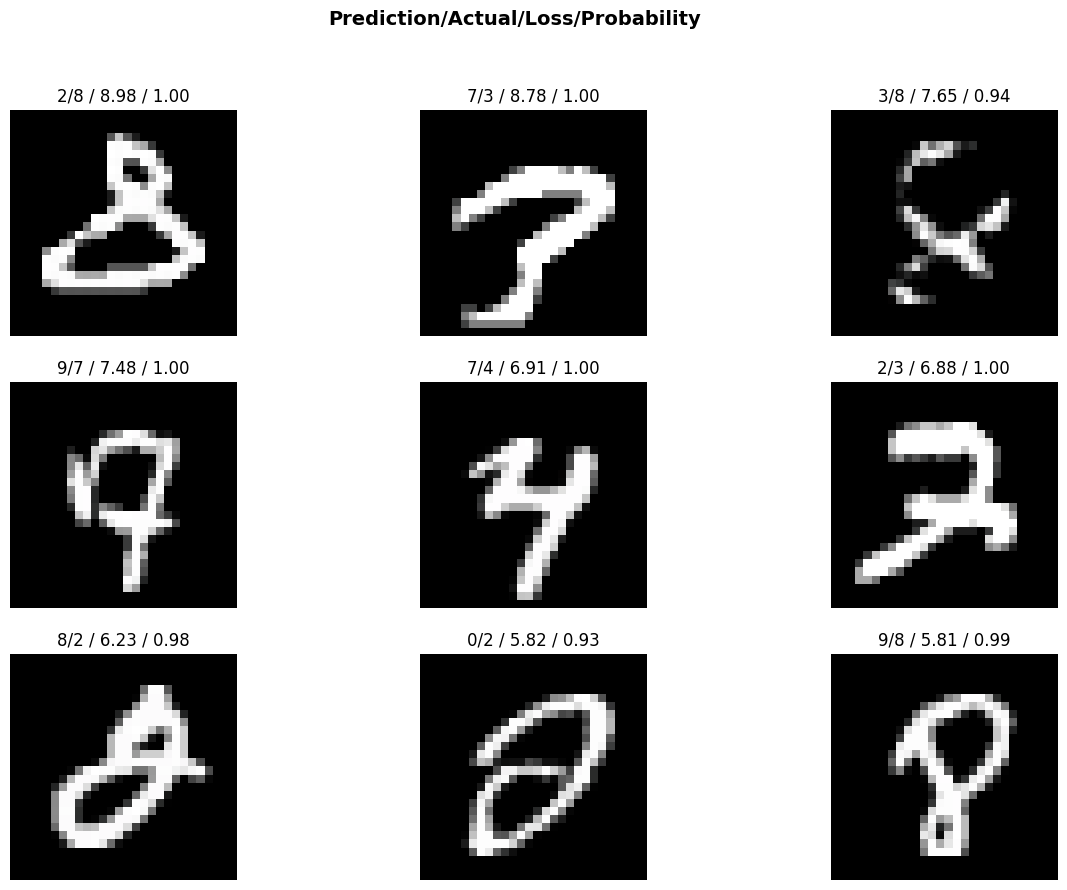

In [10]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))